# Linear Programming

In [1]:
# Import packages.
import cvxpy as cp
import numpy as np

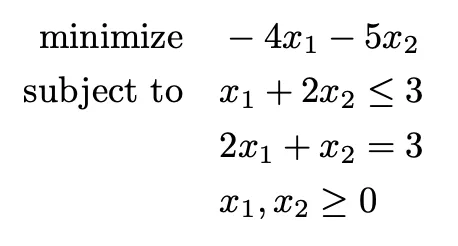

In [ ]:
# Initialize the variables
x1, x2 = cp.Variable(nonneg=True), cp.Variable(nonneg=True)

# Create objective function
objective = cp.Minimize(-4*x1 - 5*x2)

# Initialize constraints (must be a list)
constraints = [x1 + 2*x2 <= 3,
               2*x1 + x2 == 3]

# Create our problem
problem = cp.Problem(objective, constraints)

# Solve our problem
problem.solve()

# Find out what the optimal values of x1 and x2 are, and what the answer
  # our optimization problem is
print(problem.value)
print(x1.value, x2.value)

In [ ]:
x1, x2 = cp.Variable(integer=True), cp.Variable(integer=True)

objective = cp.Minimize(-4*x1 - 5*x2)

constraints = [x1 + 2*x2 <= 3,
               2*x1 + x2 == 3,
               x1 >= 0, x2 >= 0]

problem = cp.Problem(objective, constraints)

problem.solve()

print(problem.value)
print(x1.value, x2.value)

Say that a factory produces four different products, and that the daily produced amount of the first product is x₁, the amount produced of the second product is x₂, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:
1. The profit per unit of product is $20, $12, $40, and $25 for the first, second, third, and fourth product, respectively.
2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.
3. For each unit of the first product, three units of the raw material A are consumed. Each unit of the second product requires two units of the raw material A and one unit of the raw material B. Each unit of the third product needs one unit of A and two units of B. Finally, each unit of the fourth product requires three units of B.
4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material A and ninety units of B per day.

The mathematical model can be defined like this:

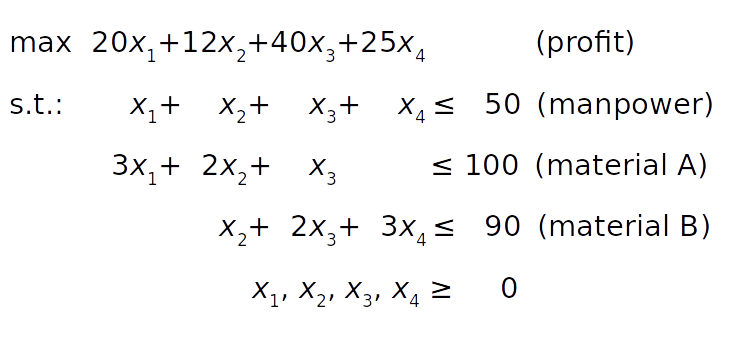

In [ ]:
x1, x2, x3, x4 = cp.Variable(integer=True), cp.Variable(integer=True), cp.Variable(integer=True), cp.Variable(integer=True)

objective = cp.Maximize(20*x1 + 12*x2 + 40*x3 + 25*x4)

constraints = [x1 + x2 + x3 + x4 <= 50,
               3*x1 + 2*x2 + 1*x3 + 0*x4 <= 100,
               0*x1 + 1*x2 + 2*x3 + 3*x4 <= 90,
               x1 >= 0, x2 >= 0, x3 >= 0, x4 >= 0]

problem = cp.Problem(objective, constraints)

problem.solve()

print(problem.value)
print(x1.value, x2.value, x3.value, x4.value)
print(problem.constraints[0].dual_value)

In [ ]:
x = cp.Variable(4, integer=True)
c = np.array([20, 12, 40, 25])
objective = cp.Maximize(c.T @ x)

A = np.array([1, 1, 1, 1])
B = np.array([3, 2, 1, 0])
C = np.array([0, 1, 2, 3])
P = np.eye(4)
constraints = [A @ x <= 50, B @ x <= 100, C @ x <= 90, P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())

In [ ]:
x = cp.Variable(4, integer=True)
c = np.array([20, 12, 40, 25]) 
objective = cp.Maximize(c.T @ x)

A = np.array([[1, 1, 1, 1],
              [3, 2, 1, 0],
              [0, 1, 2, 3]])
C = np.array([50, 100, 90])
P = np.eye(4)
constraints = [A @ x <= C, P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())

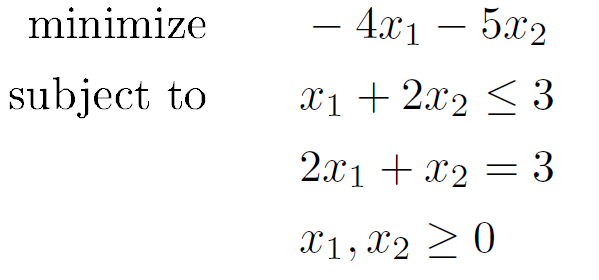

In [ ]:
# initialize the objective
x = cp.Variable(2, integer=True)
c = np.array([-4, -5]) # declare x's size and sign
objective = cp.Minimize(c.T @ x)

# Initialize constraints
A = np.array([2, 1])
G = np.array([1, 2])
P = np.eye(2)
constraints = [A @ x == 3, G @ x <= 3, P @ x >= 0] #This must be a list

problem = cp.Problem(objective, constraints)
print(problem.solve())
print(x.value)

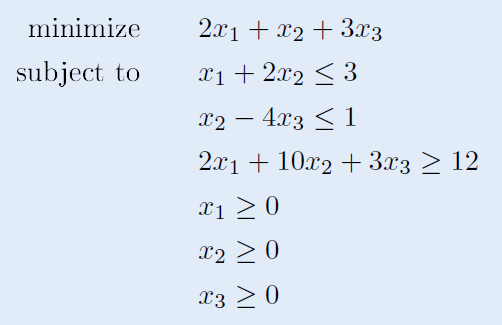

In [ ]:
x = cp.Variable(3)
c = np.array([2, 1, 3]) 
objective = cp.Minimize(c.T @ x)

A = np.array([[1, 2, 0],
              [0, 1, -4]])
B = np.array([2, 10, 3])
C = np.array([3, 1])
P = np.eye(3)
constraints = [A @ x <= C, B @ x >= 12 , P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())
print(x.value)
print(problem.constraints[2].dual_value)

**Product mix example**

- Let's imagine that the CompuQuick Corporation produces two models of computers - **Standard** and **Turbo** ($x_{1}, x_{2}$ respectively).  
- CompuQuick can sell every *Standard* unit it produces for a **profit contribution** of USD100, and each *Turbo* unit for a contribution of USD150. ($100x_{1} + 150x_{2}$)
- At the CompuQuick factory, the *Standard* computer production line can produce, at most, **100 computers per day**. ($x_{1} <= 100$)  
- At the same time, the *Turbo* computer production line can turn out **120 computers per day**. ($x_{2} <= 120$)  
- Furthermore, CompuQuick has a limited supply of daily labor. In particular, there is a total of **160 hours of labor available each day**. *Standard* computers require 1 hour of labor, while *Turbo* computers are relatively more labor intense requiring 2 hours of labor. ($x_{1} + 2x_{2} <= 160$)
- The problem for CompuQuick is to determine the mix of Standard and Turbo computers to produce each day to **maximize total profit** without exceeding line and labor capacity limits.

In [ ]:
x = cp.Variable(2, integer=True)
c = np.array([100, 150]) 
objective = cp.Maximize(c.T @ x)

A = np.array([1, 2])
B = np.array([103, 120])
P = np.eye(2)
constraints = [A @ x <= 160, P @ x <= B, P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())
print(x.value)

## Transportation Problems

Assume that we are the manager of a support chain. Our company has two factory A and B, and each of them has 300 and 250 products, respectively. Now we would like to deliver them two three retail stores in different cities 1, 2, 3. There is a cost for each delivery as listed below.

|   | Store 1 | Store 2 | Store 3 |
| --- | --- | --- | --- |
| Factory A | 5 | 6 | 4 |
| Factory B | 6 | 3 | 7 |

Problem: How to design our transpotation strategy so that we can minimize the cost.

# 1. Formulate the linear programing(LP) problem.
Let’s first try to write down our problem as a optimization problem.

Let $x=[x1,x2,…,x6]$ be the number of clothes delivering from source to destination cities, respectively.

Maybe let’s make it more clear:

$$x_{1}:A→1$$
$$x_{2}:A→2$$
$$x_{3}:A→3$$
$$x_{4}:B→1$$
$$x_{5}:B→2$$
$$x_{6}:B→3$$

Our optimization problem can be formulate as:

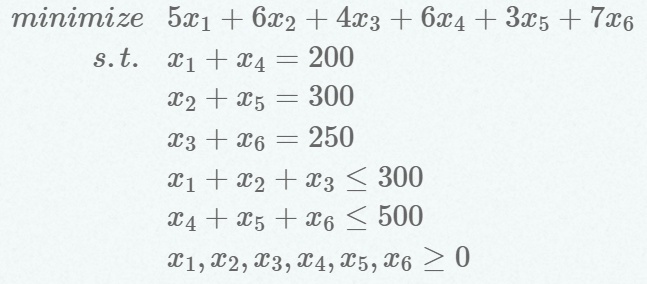

In [9]:
stores = 3
factories = 2
x = cp.Variable(stores*factories, integer=True)
c = np.array([5, 6, 4, 6, 3, 7]) 
objective = cp.Minimize(c.T @ x)

A = np.array([[1, 0, 0, 1, 0, 0],
              [0, 1, 0, 0, 1, 0],
              [0, 0, 1, 0, 0, 1]])
B = np.array([200, 300, 250])
C = np.array([[1, 1, 1, 0, 0, 0],
              [0, 0, 0, 1, 1, 1]])
D = np.array([300, 500])
P = np.eye(stores*factories)
constraints = [A @ x == B, C @ x <= D, P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())
print(x.value)

3050.0
[ 50.   0. 250. 150. 300.   0.]


| Supply | Market 1 | Market 2 | Market 3 | Market 4 | Market 5 |
| ------ | -------- | -------- | -------- | -------- | -------- |
| A      | 51       | 62       | 35       | 45       | 56       |
| B      | 59       | 68       | 50       | 39       | 46       |
| C      | 49       | 56       | 53       | 51       | 37       |

Minimize: 

$51x_{1} + 62x_{2} + 35x_{3} + 45x_{4} + 56x_{5} \\
    + 59x_{6} + 68x_{7} + 50x_{8} +  39x_{9} + 46x_{10} \\
    + 49x_{11} + 56x_{12} + 53x_{13} + 51x_{14} + 37x_{15}$

Constraints:
- $x_{1} + x_{2} + x_{3} + x_{4} + x_{5} <= 15$
- $x_{6} + x_{7} + x_{8} + x_{9} + x_{10} <= 20$
- $x_{11} + x_{12} + x_{13} + x_{14} + x_{15} <= 15$
- $x_{1} + x_{6} + x_{11} = 11$
- $x_{2} + x_{7} + x_{12} = 12$
- $x_{3} + x_{8} + x_{13} = 9$
- $x_{4} + x_{9} + x_{14} = 10$
- $x_{5} + x_{10} + x_{15} = 8$

In [10]:
supplies = 3
markets = 5
x = cp.Variable(supplies*markets, integer=True)
c = np.array([51, 62, 35, 45, 56,
              59, 68, 50, 39, 46,
              49, 56, 53, 51, 37]) 
objective = cp.Minimize(c.T @ x)

A = np.array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])
B = np.array([11, 12, 9, 10, 8])
C = np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])
D = np.array([15, 20, 15])
P = np.eye(supplies*markets)
constraints = [A @ x == B, C @ x <= D, P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())
print(x.value)

2316.0
[ 6.  0.  9.  0.  0.  2.  0.  0. 10.  8.  3. 12.  0.  0.  0.]


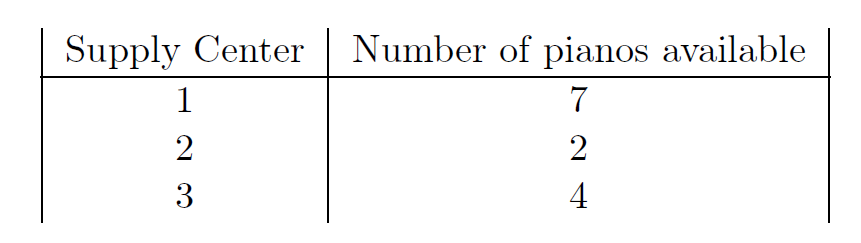
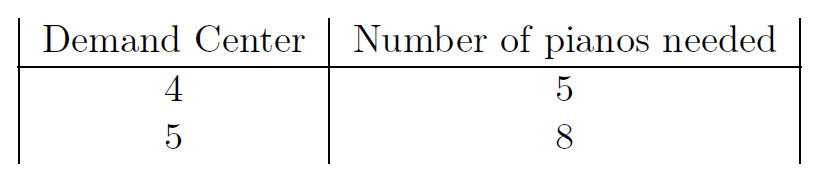
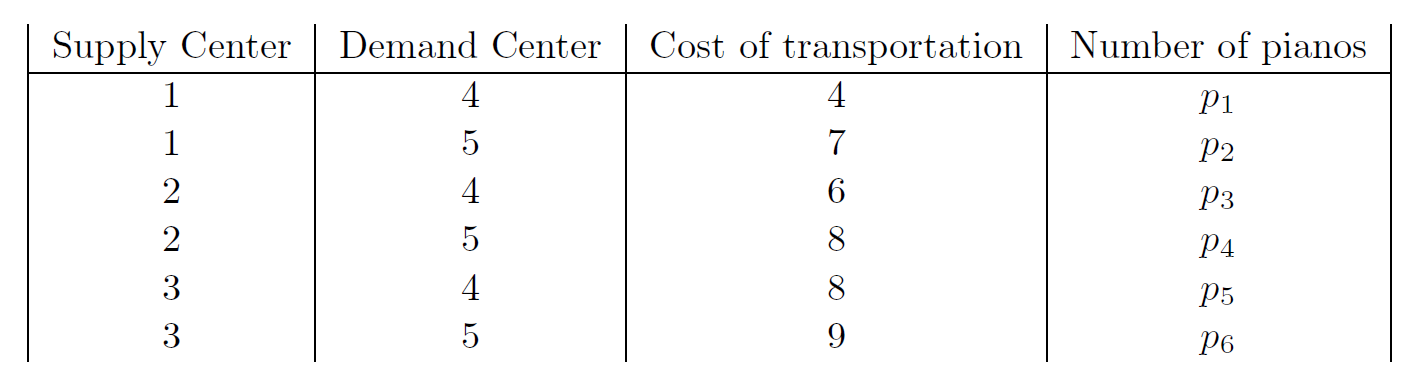

Minimize: 

$4x_{1} + 7x_{2} + 6x_{3} + 8x_{4} + 8x_{6} + 9x_{7}$

Constraints:
- $x_{1} + x_{2} = 7$
- $x_{3} + x_{4} = 2$
- $x_{5} + x_{6} = 4$
- $x_{1} + x_{3} + x_{5} = 5$
- $x_{2} + x_{4} + x_{6} = 8$

In [12]:
suppliers = 3
demands = 2
x = cp.Variable(suppliers*demands, integer=True)
c = np.array([4, 7, 6, 8, 8, 9]) 
objective = cp.Minimize(c.T @ x)

A = np.array([[1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 1]])
B = np.array([7, 2, 4])
C = np.array([[1, 0, 1, 0, 1, 0],
              [0, 1, 0, 1, 0, 1]])
D = np.array([5, 8])
P = np.eye(suppliers*demands)
constraints = [A @ x == B, C @ x <= D, P @ x >= 0]

problem = cp.Problem(objective, constraints)
print(problem.solve())
print(x.value)

86.0
[5. 2. 0. 2. 0. 4.]
